# US Financial Distress Prediction: Modeling

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, plot_roc_curve

In [4]:
data = pd.read_csv('distressdata.csv')
data.head()

,profitMgn,grossMgn,opMgn,ebitdaMgn,roe,roa,roc,current,quick,tfotl,tlta,noCreditInt,intCover,piotroski,cpi,realRate,distress
0,0.119448,0.503151,0.748416,0.117740,0.264377,0.098580,0.098580,0.983430,0.956813,0.168346,0.561344,-1.0,-1.000000,5.0,98.737477,3.082411,1
1,-0.006918,0.471108,0.766793,-0.020082,-0.012330,-0.004072,-0.004072,0.998274,0.995394,0.079861,0.584804,-1.0,0.909638,4.0,98.386420,2.468829,0
2,0.124986,0.491630,0.749778,0.111221,0.208279,0.070428,0.070428,0.964096,0.943470,0.110690,0.582510,-1.0,-1.000000,7.0,100.000000,2.060737,0
3,0.151803,0.488040,0.718755,0.141152,0.230272,0.111274,0.111274,0.995357,0.987704,0.259681,0.480368,-1.0,-1.000000,7.0,103.156842,1.137338,0
4,0.166558,0.481947,0.710339,0.153487,0.218778,0.109000,0.118742,0.985079,0.957057,0.225544,0.468290,-1.0,-1.000000,5.0,105.291505,1.307083,0


In [6]:
X = data.drop('distress', axis=1)
y = data['distress']
trainX, testX, trainY, testY = train_test_split(X, y)

In [12]:
rf = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                 param_grid={'n_estimators': [500, 1500, 3000],
                            'max_features': ['sqrt', 'log2']})
rf.fit(X=trainX, y=trainY)
rfPreds = rf.predict(testX)

In [14]:
rf.best_estimator_

RandomForestClassifier(max_features='sqrt', n_estimators=3000, random_state=1)

In [13]:
print(classification_report(y_true=testY, y_pred=rfPreds))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3327
           1       0.79      0.76      0.78      1595

    accuracy                           0.86      4922
   macro avg       0.84      0.83      0.84      4922
weighted avg       0.86      0.86      0.86      4922



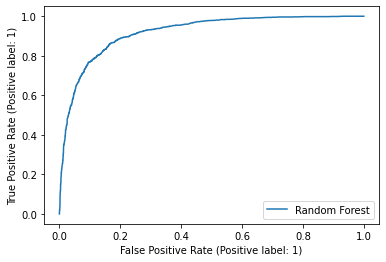

In [19]:
plot_roc_curve(estimator=rf, X=testX, y=testY, label="Random Forest")